In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.shape

(400, 5)

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
x=df[['EstimatedSalary','Purchased']]
x

,EstimatedSalary,Purchased
0,19000,0
1,20000,0
2,43000,0
3,57000,0
4,76000,0
...,...,...
395,41000,1
396,23000,1
397,20000,1
398,33000,0


In [9]:
y=df[['Purchased']]

In [10]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [12]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Unclustered data')

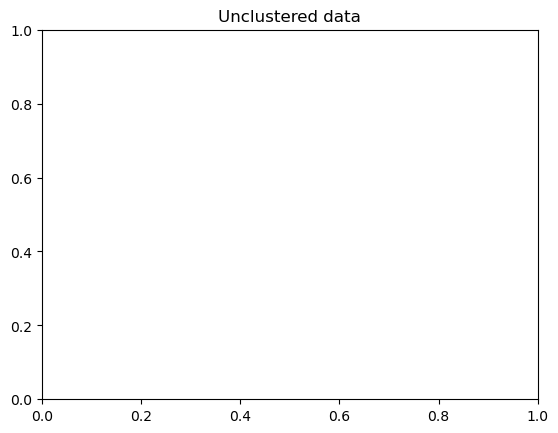

In [13]:
plt.title('Unclustered data')

Text(0, 0.5, 'Purchsed')

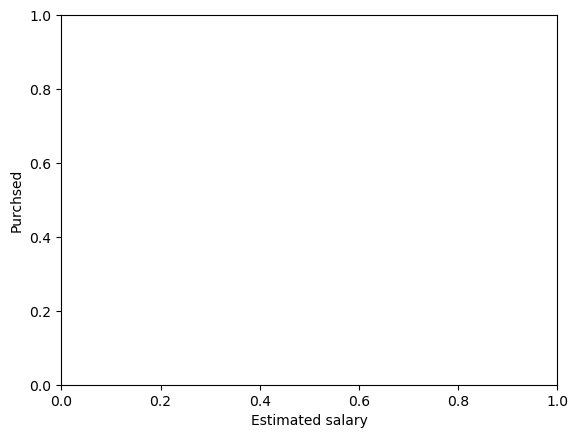

In [14]:
plt.xlabel('Estimated salary')
plt.ylabel('Purchsed')

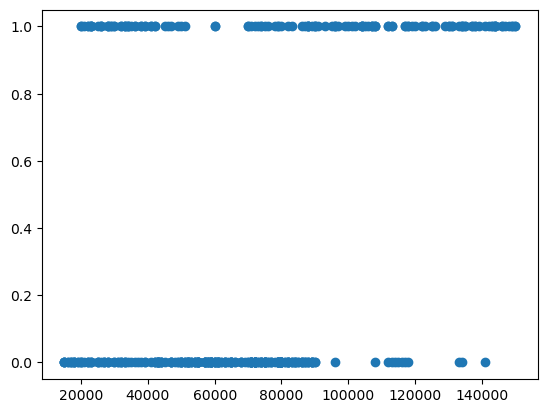

In [16]:
plt.scatter(x['EstimatedSalary'],x['Purchased'])

In [18]:
#elbow find k
from sklearn.cluster import KMeans
sse=[]

In [21]:
for k in range(1,16):
    km=KMeans(n_clusters=k,n_init=100)
    km.fit_predict(x)
    sse.append(km.inertia_)

C:\Users\sanik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sanik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sanik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\sanik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

In [ ]:
#plot sse vs k
plt.title('Elbow')
plt.xlabel('k')
plt.ylabel('Ssse')
plt.plot(range(1,16),sse,marker='.',color='r')
plt.grid()
plt.xticks(range(1,16))

km=KMeans(n_clusters=3)

In [24]:
labels=km.fit_predict(x)

C:\Users\sanik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sanik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [25]:
cent=[]

In [26]:
cent=km.cluster_centers_

In [27]:
cent

array([[3.47872340e+04, 3.19148936e-01],
       [1.25310811e+05, 8.51351351e-01],
       [7.41567568e+04, 1.89189189e-01]])

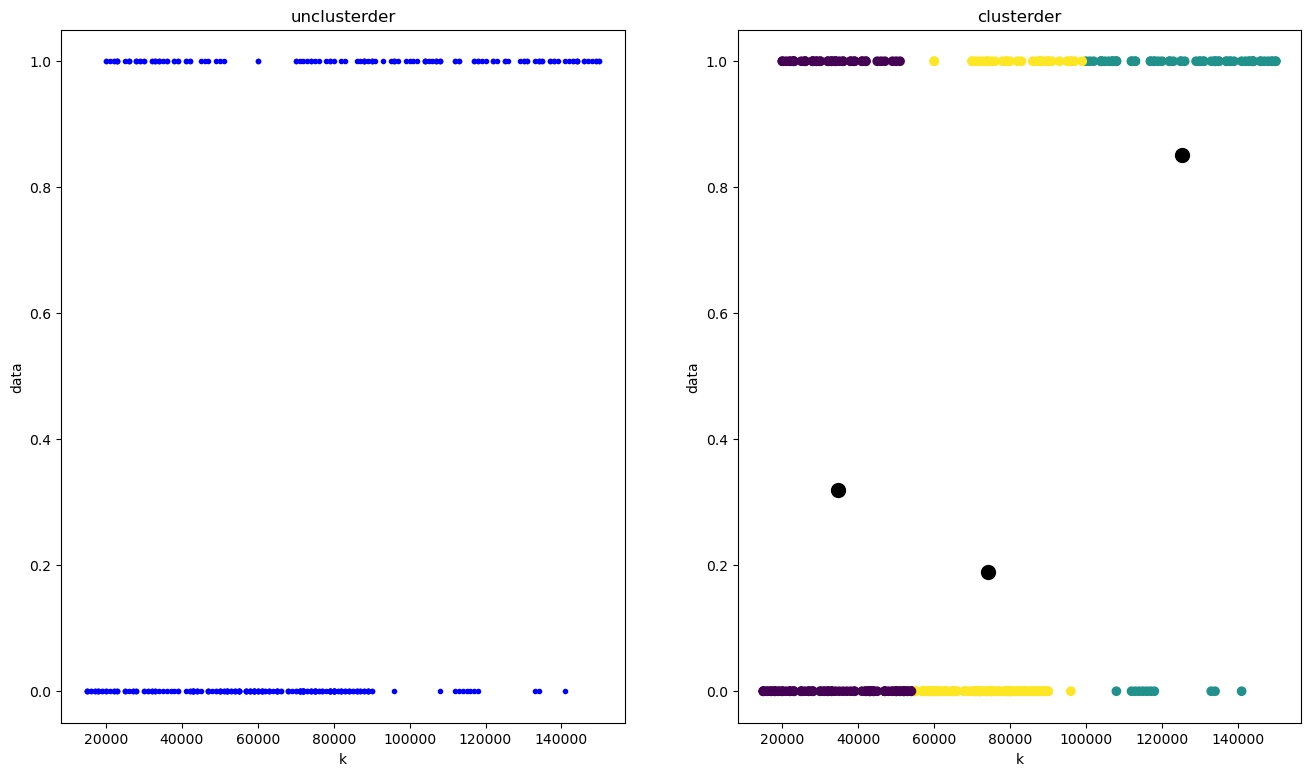

In [31]:
#2 plots
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('unclusterder')
plt.xlabel('k')
plt.ylabel('data')
plt.scatter(x['EstimatedSalary'],x['Purchased'],marker='.',color='b')



plt.subplot(1,2,2)
plt.title('clusterder')
plt.xlabel('k')
plt.ylabel('data')
plt.scatter(x['EstimatedSalary'],x['Purchased'],c=labels)
plt.scatter(cent[:,0],cent[:,1],s=100,color='k')
